Dataset 1:
   index                         product                    helpful_count  \
0      0  Apple iPhone XR (64GB) - Black  5,087 people found this helpful   
1      1  Apple iPhone XR (64GB) - Black  2,822 people found this helpful   
2      2  Apple iPhone XR (64GB) - Black  1,798 people found this helpful   
3      3  Apple iPhone XR (64GB) - Black  1,366 people found this helpful   
4      4  Apple iPhone XR (64GB) - Black    536 people found this helpful   

   total_comments                                                url  \
0              24  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   
1               6  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   
2               0  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   
3              14  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   
4               5  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   

  review_country reviewed_at  \
0         India   2018-12-12   
1         India   2018-11-17 

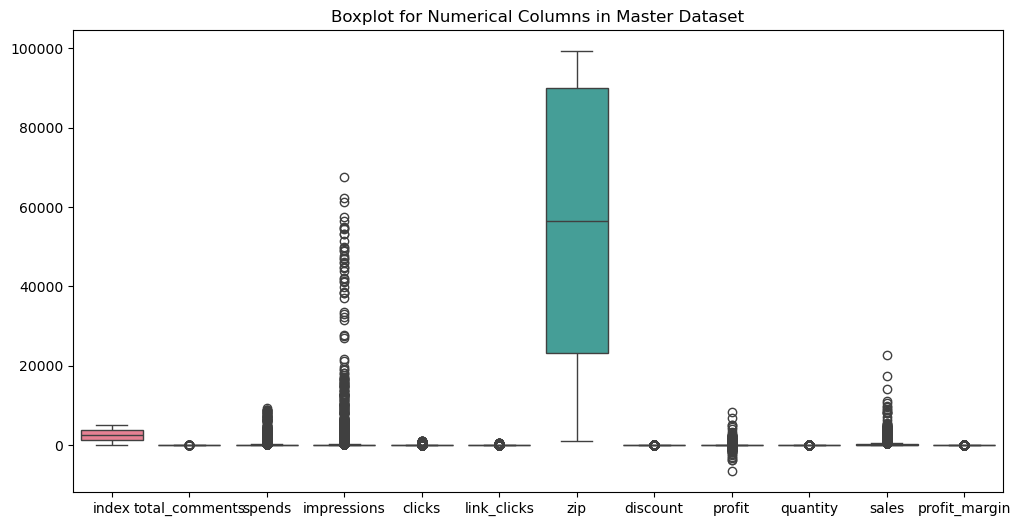

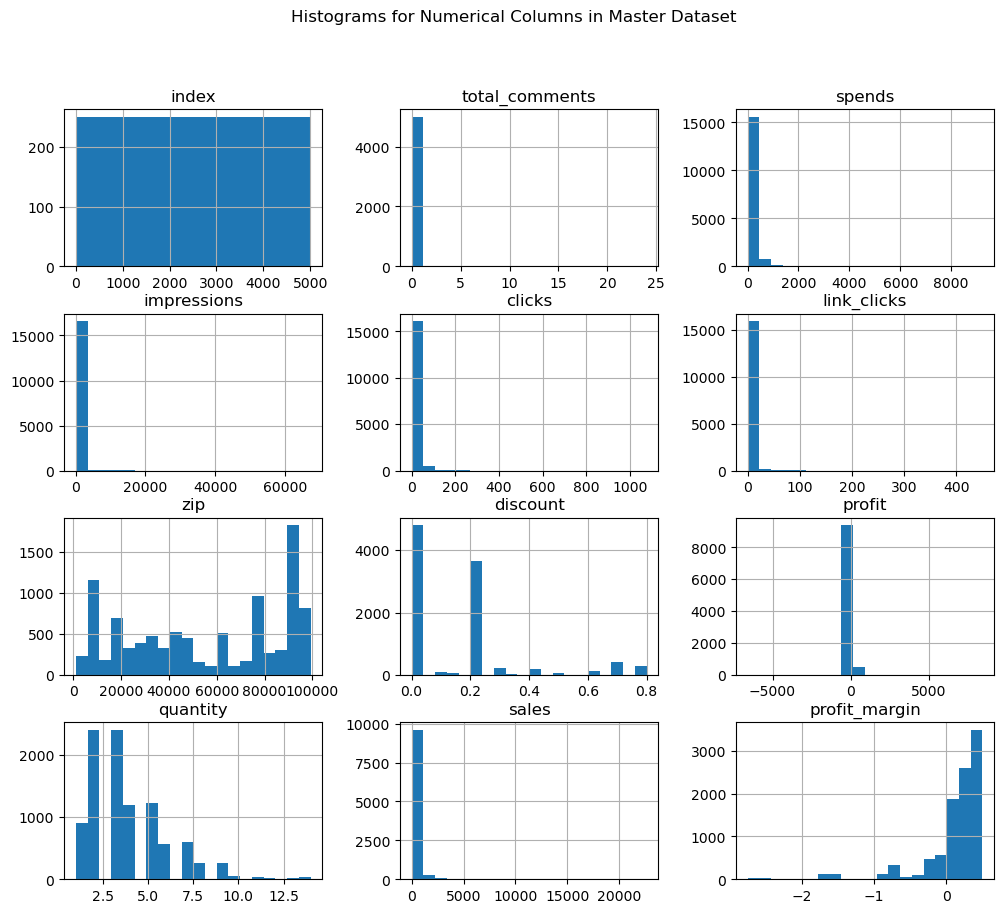

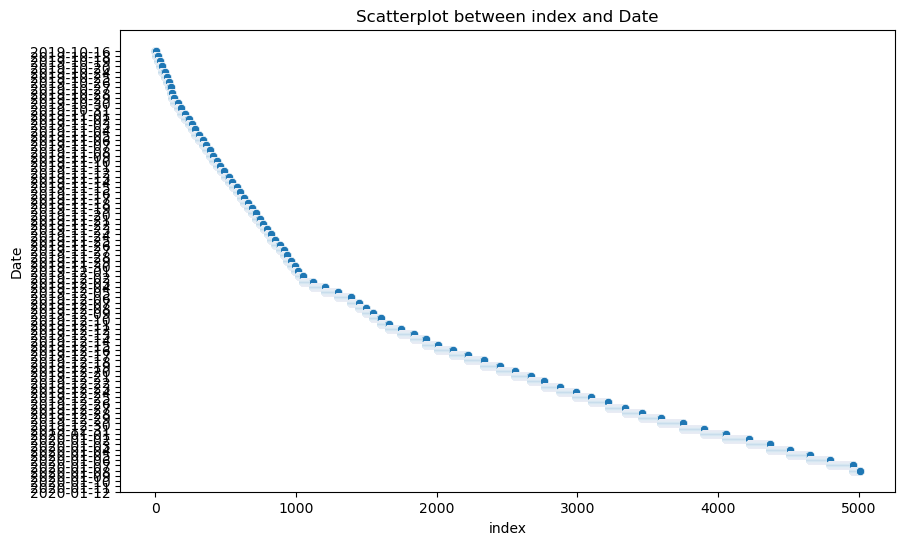

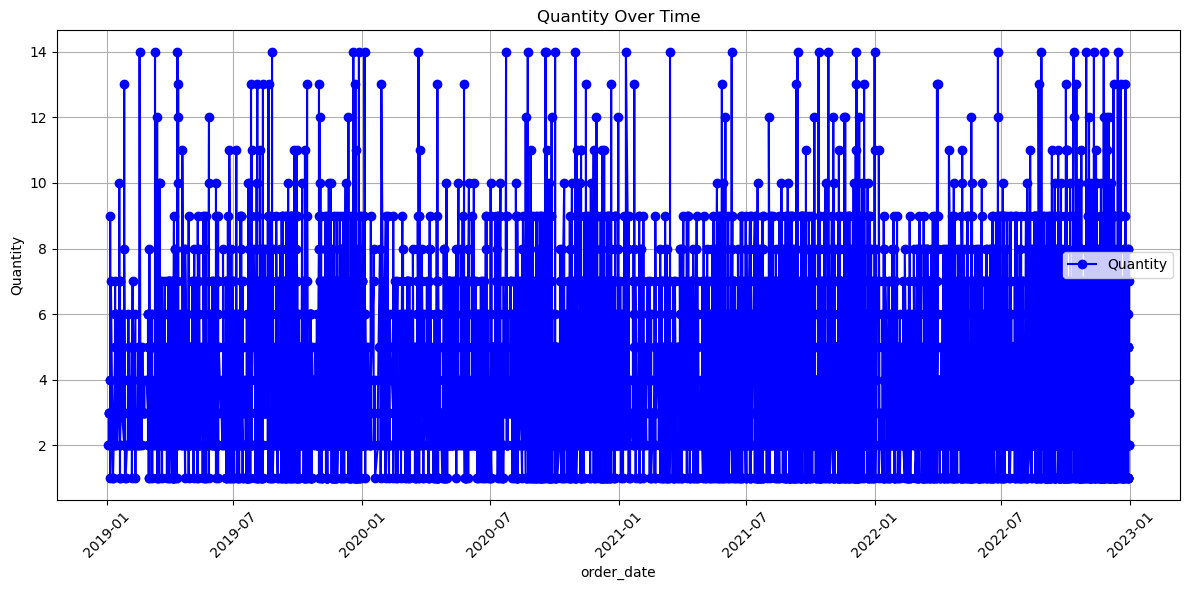

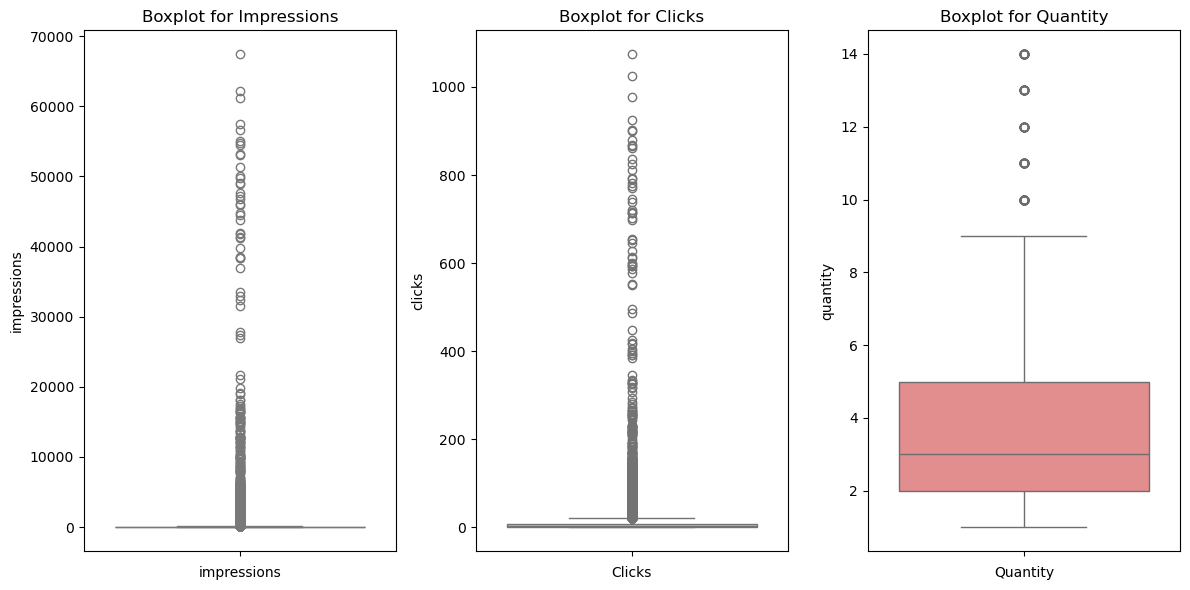

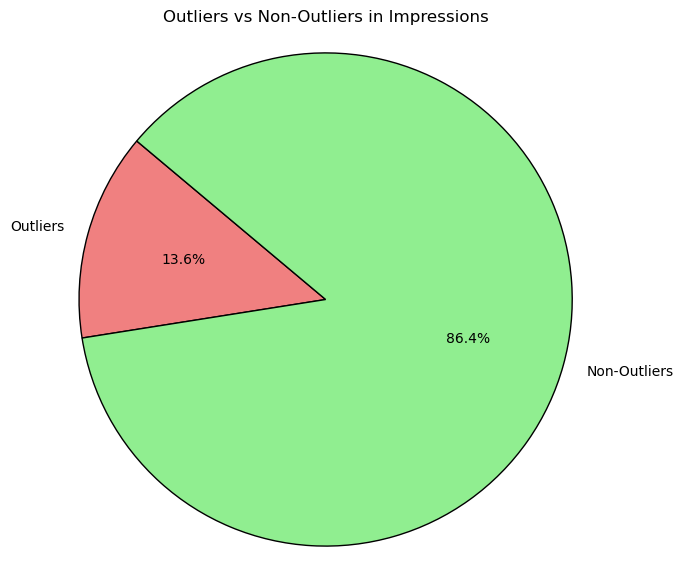

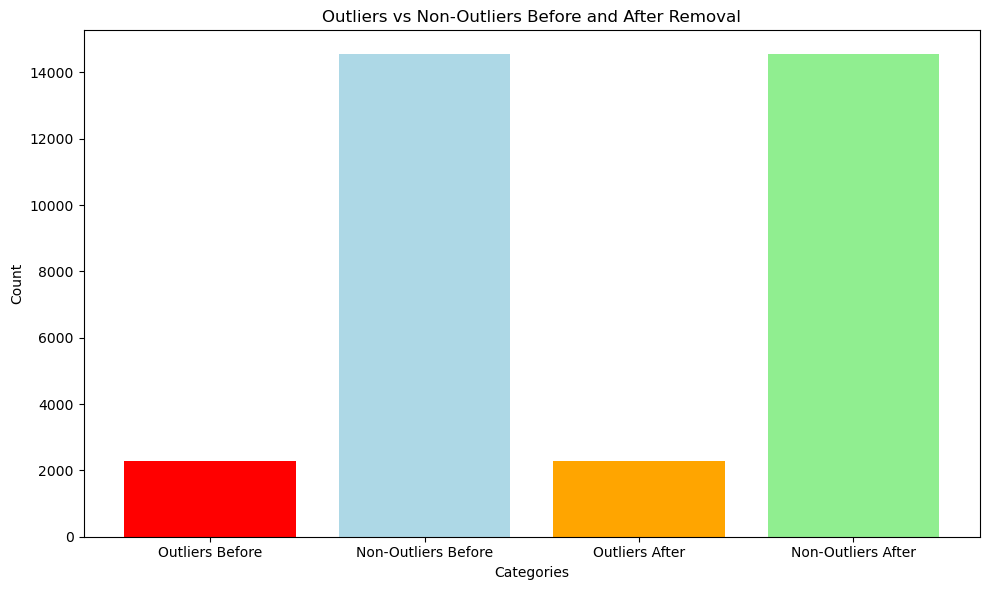

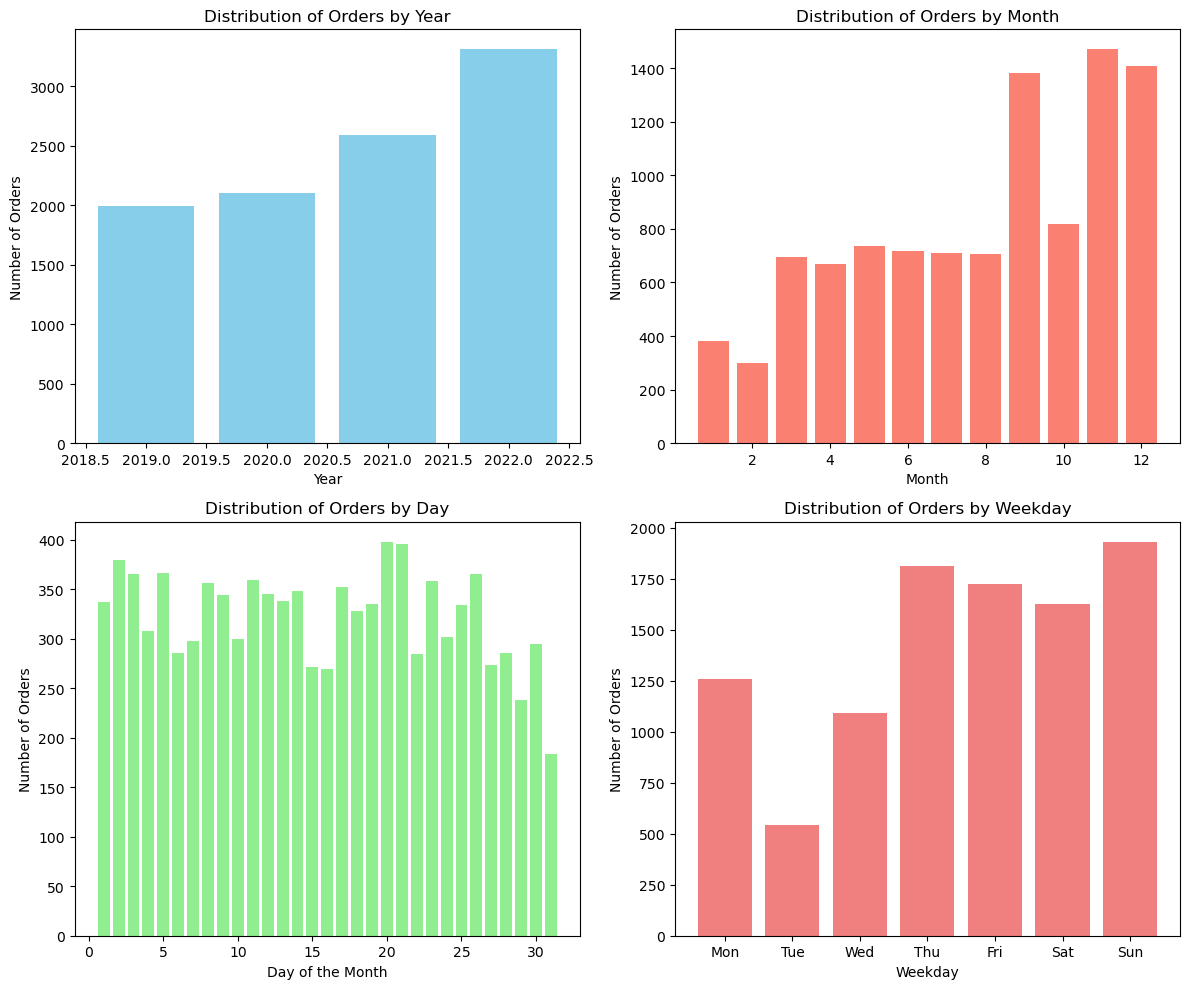

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Datasets one by one
dataset1 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\apple_iphone_11_reviews.csv')
dataset2 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\Copy of fbdata.csv')
dataset3 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv')
# Print each dataset separately
print("Dataset 1:")
print(dataset1.head())  

print("\nDataset 2:")
print(dataset2.head())

print("\nDataset 3:")
print(dataset3.head())

# Combine the datasets with printing distint coloumns
# Concatenating with axis=1 will place them side-by-side
master_dataset = pd.concat([dataset1, dataset2, dataset3], axis=1)

# Print the master dataset
print("\nmaster_dataset:")
print(master_dataset.head())  # Displaying first few rows for brevity

# ---------------------------------------------------    Coming to the next step -2  -----------------------------------------------------------------------------

# Plot Boxplot for numerical columns in the master dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=master_dataset.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Numerical Columns in Master Dataset')
plt.show()

# Plot Histograms for numerical columns in the master dataset
master_dataset.select_dtypes(include=['float64', 'int64']).hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms for Numerical Columns in Master Dataset')
plt.show()

# Scatterplot for a pair of numerical columns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=master_dataset, x=dataset1.columns[0], y=dataset2.columns[0])
plt.title(f'Scatterplot between {dataset1.columns[0]} and {dataset2.columns[0]}')
plt.show()
#--------------------------------------------------------------------step - 3 ---------------------------------------------------------------

# Assuming 'quantity' and 'date' columns exist in one of the datasets
# For this example, let's assume dataset3 has 'quantity' and 'date' columns
dataset3['order_date'] = pd.to_datetime(dataset3['order_date'])  # Convert date to datetime format
dataset3 = dataset3.sort_values(by='order_date')  # Sort by date to plot time series

# Plot Quantity over Time
plt.figure(figsize=(12, 6))
plt.plot(dataset3['order_date'], dataset3['quantity'], marker='o', linestyle='-', color='b', label='Quantity')
plt.title('Quantity Over Time')
plt.xlabel('order_date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#----------------------------------------------------------------step- 4---------------------------------------------------------------------

# Assuming 'impressions', 'clicks', and 'quantity' columns exist in one of the datasets
# For example, dataset3 may contain 'impressions', 'clicks', and 'quantity' columns
# Plot Boxplot for Impressions, Clicks, and Quantity
plt.figure(figsize=(12, 6))

# Boxplot for Impressions
plt.subplot(1, 3, 1)
sns.boxplot(data=dataset2['impressions'], color='lightblue')
plt.title('Boxplot for Impressions')
plt.xlabel('impressions')

# Boxplot for Clicks
plt.subplot(1, 3, 2)
sns.boxplot(data=dataset2['clicks'], color='lightgreen')
plt.title('Boxplot for Clicks')
plt.xlabel('Clicks')

# Boxplot for Quantity
plt.subplot(1, 3, 3)
sns.boxplot(data=dataset3['quantity'], color='lightcoral')
plt.title('Boxplot for Quantity')
plt.xlabel('Quantity')

plt.tight_layout()
plt.show()

#--------------------------------------------------------------------step - 5------------------------------------------------------------------


# Assuming dataset2 is already loaded and 'impressions' column exists
Q1 = dataset2['impressions'].quantile(0.25)
Q3 = dataset2['impressions'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = dataset2[(dataset2['impressions'] < lower_bound) | (dataset2['impressions'] > upper_bound)]

# Count the number of outliers and non-outliers
outliers_count = len(outliers)
non_outliers_count = len(dataset2) - outliers_count

# Prepare data for the pie chart
labels = ['Outliers', 'Non-Outliers']
sizes = [outliers_count, non_outliers_count]
colors = ['lightcoral', 'lightgreen']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Outliers vs Non-Outliers in Impressions')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


#--------------------------------------------------------------------step - 6------------------------------------------------------------------

# Assuming dataset2 is already loaded and 'impressions' column exists
Q1 = dataset2['impressions'].quantile(0.25)
Q3 = dataset2['impressions'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers_before = dataset2[(dataset2['impressions'] < lower_bound) | (dataset2['impressions'] > upper_bound)]
non_outliers_before = dataset2[(dataset2['impressions'] >= lower_bound) & (dataset2['impressions'] <= upper_bound)]

# Remove outliers from the dataset
dataset2_cleaned = dataset2[(dataset2['impressions'] >= lower_bound) & (dataset2['impressions'] <= upper_bound)]

# Count the number of outliers and non-outliers before and after removing them
outliers_count_before = len(outliers_before)
non_outliers_count_before = len(non_outliers_before)
outliers_count_after = len(dataset2) - len(dataset2_cleaned)  # Remaining outliers after removal
non_outliers_count_after = len(dataset2_cleaned)

# Prepare data for the bar chart
categories = ['Outliers Before', 'Non-Outliers Before', 'Outliers After', 'Non-Outliers After']
counts = [outliers_count_before, non_outliers_count_before, outliers_count_after, non_outliers_count_after]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['red', 'lightblue', 'orange', 'lightgreen'])

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Outliers vs Non-Outliers Before and After Removal')

# Display the bar chart
plt.tight_layout()
plt.show()

#------------------------------------------------------------------step - 7--------------------------------------------------------------------------

# Assuming dataset3 is already loaded and 'order_date' column is in datetime format

# Extract year, month, day, weekday, and other date-related features
dataset3['year'] = dataset3['order_date'].dt.year
dataset3['month'] = dataset3['order_date'].dt.month
dataset3['day'] = dataset3['order_date'].dt.day
dataset3['weekday'] = dataset3['order_date'].dt.weekday

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Year
axes[0, 0].bar(dataset3['year'].value_counts().index, dataset3['year'].value_counts().values, color='skyblue')
axes[0, 0].set_title('Distribution of Orders by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Orders')

# Plot for Month
axes[0, 1].bar(dataset3['month'].value_counts().index, dataset3['month'].value_counts().values, color='salmon')
axes[0, 1].set_title('Distribution of Orders by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Orders')

# Plot for Day
axes[1, 0].bar(dataset3['day'].value_counts().index, dataset3['day'].value_counts().values, color='lightgreen')
axes[1, 0].set_title('Distribution of Orders by Day')
axes[1, 0].set_xlabel('Day of the Month')
axes[1, 0].set_ylabel('Number of Orders')

# Plot for Weekday
axes[1, 1].bar(dataset3['weekday'].value_counts().index, dataset3['weekday'].value_counts().values, color='lightcoral')
axes[1, 1].set_title('Distribution of Orders by Weekday')
axes[1, 1].set_xlabel('Weekday')
axes[1, 1].set_ylabel('Number of Orders')
axes[1, 1].set_xticks([0, 1, 2, 3, 4, 5, 6])
axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Adjust layout
plt.tight_layout()
plt.show()


